# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [9]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [10]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import SampleTask

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = SampleTask(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

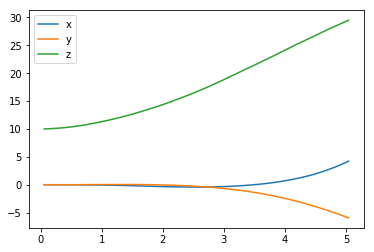

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

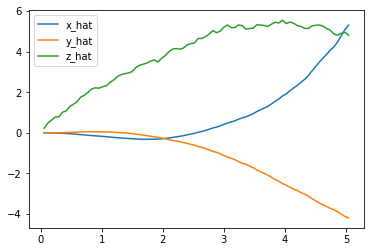

In [12]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

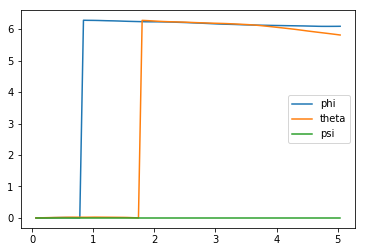

In [13]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

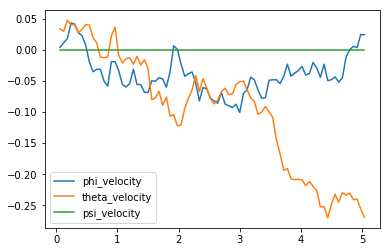

In [14]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

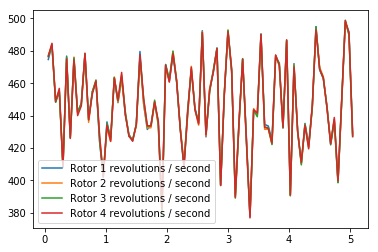

In [15]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [16]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  4.23094707  -5.9530341   29.49801117   6.09125322   5.81375495   0.        ]
[ 5.30191714 -4.1892611   4.81340585]
[ 0.02461175 -0.26940345  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [17]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import SampleTask

num_episodes = 250
target_pos = np.array([0., 0., 10.])
task = SampleTask(target_pos=target_pos)
agent = PolicySearch_Agent(task)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  250, score =  -1.384 (best =  -0.315), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Trial with MountainCarContinuous-v0

As training the quadcopter proved to be an exceedling hard task, I have decided to first test my agent with a well-known task with clear benchmarks to achieve. To this end I have used OpenAI's MountainCarContinuous-v0 environment. The task is to move a car up a hill, with a reward of 100 when the task is achieved, and negative rewards proportional to the squares of each action taken. The actions can take continuous values in $[-1,1]$, and thus MountainCarContinuous-v0 is a good test-case for the quadcopter agent, although it has simpler physics.

The environment can be visualised with the render() function, and looks like this:
![](MountainCarScreenshot.png "MountainCarContinuous environment")

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =    1, total_reward = -17.498 (best =  -17.50), average_10 =   -1.75, average_reward =  -17.50, episode_steps = 999
Episode =    2, total_reward =  84.979 (best =   84.98), average_10 =    6.75, average_reward =   33.74, episode_steps = 768
Episode =    3, total_reward =  90.475 (best =   90.47), average_10 =   15.80, average_reward =   52.65, episode_steps = 360
Episode =    4, total_reward =  71.789 (best =   90.47), average_10 =   22.97, average_reward =   57.44, episode_steps = 288
Episode =    5, total_reward =   9.264 (best =   90.47), average_10 =   23.90, average_reward =   47.80, episode_steps = 897
Episode =    6, total_reward = -110.869 (best =   90.47), average_10 =    6.07, average_reward =   21.36, episode_steps = 999
Episode =    7, total_reward = -86.247 (best =   90

Episode =   65, total_reward = -124.254 (best =   90.47), average_10 = -114.47, average_reward =  -51.18, episode_steps = 999
Episode =   66, total_reward = -113.884 (best =   90.47), average_10 = -112.29, average_reward =  -52.13, episode_steps = 999
Episode =   67, total_reward = -112.922 (best =   90.47), average_10 = -111.84, average_reward =  -53.04, episode_steps = 999
Episode =   68, total_reward = -97.599 (best =   90.47), average_10 = -110.23, average_reward =  -53.69, episode_steps = 999
Episode =   69, total_reward = -123.386 (best =   90.47), average_10 = -110.36, average_reward =  -54.70, episode_steps = 999
Episode =   70, total_reward = -85.498 (best =   90.47), average_10 = -109.07, average_reward =  -55.14, episode_steps = 999
Episode =   71, total_reward = -114.991 (best =   90.47), average_10 = -110.25, average_reward =  -55.98, episode_steps = 999
Episode =   72, total_reward = -120.297 (best =   90.47), average_10 = -112.89, average_reward =  -56.88, episode_steps 

Episode =  131, total_reward =  85.226 (best =   95.26), average_10 =   81.49, average_reward =    3.00, episode_steps = 144
Episode =  132, total_reward =  88.552 (best =   95.26), average_10 =   82.22, average_reward =    3.65, episode_steps = 120
Episode =  133, total_reward =  83.182 (best =   95.26), average_10 =   82.77, average_reward =    4.25, episode_steps = 180
Episode =  134, total_reward =  86.956 (best =   95.26), average_10 =   83.82, average_reward =    4.86, episode_steps =  96
Episode =  135, total_reward =  84.060 (best =   95.26), average_10 =   84.09, average_reward =    5.45, episode_steps = 174
Episode =  136, total_reward =  86.535 (best =   95.26), average_10 =   84.40, average_reward =    6.05, episode_steps = 168
Episode =  137, total_reward =  85.306 (best =   95.26), average_10 =   84.70, average_reward =    6.62, episode_steps = 153
Episode =  138, total_reward =  80.993 (best =   95.26), average_10 =   84.58, average_reward =    7.16, episode_steps = 192


Episode =  197, total_reward =  88.470 (best =   95.26), average_10 =   70.91, average_reward =   28.65, episode_steps = 126
Episode =  198, total_reward =  72.467 (best =   95.26), average_10 =   69.71, average_reward =   28.87, episode_steps = 339
Episode =  199, total_reward =  90.931 (best =   95.26), average_10 =   70.90, average_reward =   29.18, episode_steps = 135
Episode =  200, total_reward =  85.963 (best =   95.26), average_10 =   83.08, average_reward =   29.46, episode_steps = 117
Episode =  201, total_reward =  82.789 (best =   95.26), average_10 =   83.42, average_reward =   29.73, episode_steps = 123
Episode =  202, total_reward =  74.371 (best =   95.26), average_10 =   82.28, average_reward =   29.95, episode_steps = 387
Episode =  203, total_reward =  76.543 (best =   95.26), average_10 =   81.86, average_reward =   30.18, episode_steps = 207
Episode =  204, total_reward =  86.643 (best =   95.26), average_10 =   81.46, average_reward =   30.46, episode_steps = 156


Episode =  263, total_reward =  55.242 (best =   95.26), average_10 =   24.73, average_reward =   39.38, episode_steps = 441
Episode =  264, total_reward =  72.075 (best =   95.26), average_10 =   27.87, average_reward =   39.50, episode_steps = 273
Episode =  265, total_reward =  37.798 (best =   95.26), average_10 =   23.85, average_reward =   39.50, episode_steps = 651
Episode =  266, total_reward = -99.495 (best =   95.26), average_10 =    6.54, average_reward =   38.98, episode_steps = 999
Episode =  267, total_reward =  36.112 (best =   95.26), average_10 =    4.94, average_reward =   38.96, episode_steps = 627
Episode =  268, total_reward = -101.897 (best =   95.26), average_10 =    3.84, average_reward =   38.44, episode_steps = 999
Episode =  269, total_reward =  40.032 (best =   95.26), average_10 =    2.61, average_reward =   38.44, episode_steps = 519
Episode =  270, total_reward = -102.259 (best =   95.26), average_10 =  -10.77, average_reward =   37.92, episode_steps = 99

Episode =  329, total_reward =  85.455 (best =   95.26), average_10 =   80.33, average_reward =   33.73, episode_steps = 126
Episode =  330, total_reward =  88.335 (best =   95.26), average_10 =   81.37, average_reward =   33.89, episode_steps = 171
Episode =  331, total_reward =  83.161 (best =   95.26), average_10 =   81.19, average_reward =   34.04, episode_steps = 168
Episode =  332, total_reward =  78.763 (best =   95.26), average_10 =   81.46, average_reward =   34.18, episode_steps = 180
Episode =  333, total_reward =  83.996 (best =   95.26), average_10 =   82.15, average_reward =   34.33, episode_steps = 210
Episode =  334, total_reward =  77.946 (best =   95.26), average_10 =   81.93, average_reward =   34.46, episode_steps = 195
Episode =  335, total_reward =  77.281 (best =   95.26), average_10 =   81.08, average_reward =   34.58, episode_steps = 231
Episode =  336, total_reward =  73.737 (best =   95.26), average_10 =   80.87, average_reward =   34.70, episode_steps = 243


Episode =  395, total_reward =  63.355 (best =   95.26), average_10 =   76.06, average_reward =   41.34, episode_steps = 390
Episode =  396, total_reward =  78.606 (best =   95.26), average_10 =   75.55, average_reward =   41.43, episode_steps = 270
Episode =  397, total_reward =  86.038 (best =   95.26), average_10 =   76.66, average_reward =   41.54, episode_steps = 177
Episode =  398, total_reward =  86.415 (best =   95.26), average_10 =   77.02, average_reward =   41.65, episode_steps = 168
Episode =  399, total_reward =  83.150 (best =   95.26), average_10 =   79.12, average_reward =   41.76, episode_steps = 168
Episode =  400, total_reward =  82.973 (best =   95.26), average_10 =   79.07, average_reward =   41.86, episode_steps = 273
Episode =  401, total_reward =  84.852 (best =   95.26), average_10 =   79.17, average_reward =   41.97, episode_steps = 168
Episode =  402, total_reward =  83.802 (best =   95.26), average_10 =   79.17, average_reward =   42.07, episode_steps = 165


Episode =  461, total_reward =  65.013 (best =   95.26), average_10 =   82.50, average_reward =   46.83, episode_steps = 471
Episode =  462, total_reward =  86.343 (best =   95.26), average_10 =   82.84, average_reward =   46.92, episode_steps = 168
Episode =  463, total_reward =  84.221 (best =   95.26), average_10 =   82.89, average_reward =   47.00, episode_steps = 204
Episode =  464, total_reward =  87.447 (best =   95.26), average_10 =   82.66, average_reward =   47.08, episode_steps =  75
Episode =  465, total_reward =  84.904 (best =   95.26), average_10 =   83.01, average_reward =   47.17, episode_steps = 141
Episode =  466, total_reward =  77.091 (best =   95.26), average_10 =   82.82, average_reward =   47.23, episode_steps = 258
Episode =  467, total_reward =  63.912 (best =   95.26), average_10 =   80.98, average_reward =   47.27, episode_steps = 420
Episode =  468, total_reward =  75.929 (best =   95.26), average_10 =   80.11, average_reward =   47.33, episode_steps = 267


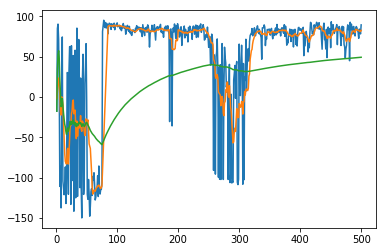

In [1]:
# testing agent with Continuous Mountain Car game
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import math
from agents.agent import DDPG
from task import MountainCarContinuousTask
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

num_episodes = 500
gamma = 0.7
theta = 0.15
sigma = 0.2

task = MountainCarContinuousTask()
agent = DDPG(task, gamma, theta, sigma)

rewards_data = {x : [] for x in ['episode', 'total_reward', 'running_average', 'average_reward']}

best_total_reward = -math.inf
average_reward = 0
average_10 = 0

for i_episode in range(1, num_episodes+1):

    state = agent.reset_episode() # start a new episode
    total_reward = 0
    episode_steps = 0    

    while True:
        action = agent.act(state)
        task.env.render()
        next_state, reward, done = task.step(action)
        episode_steps += task.action_repeat
        total_reward += reward
        agent.step(action, reward, next_state, done)
        state = next_state

        if done:
            if total_reward > best_total_reward:
                best_total_reward = total_reward
            average_reward = (average_reward*(i_episode - 1) + total_reward)/i_episode        
            rewards_data['episode'].append(i_episode)
            rewards_data['total_reward'].append(total_reward)
            average_10 = sum(rewards_data['total_reward'][i_episode-10:i_episode])/10
            rewards_data['running_average'].append(average_10)
            rewards_data['average_reward'].append(average_reward)
            print("\rEpisode = {:4d}, total_reward = {:7.3f} (best = {:7.2f}), average_10 = {:7.2f}, average_reward = {:7.2f}, episode_steps = {:3d}".format(i_episode, total_reward, best_total_reward, average_10, average_reward, episode_steps))#, end="")
            break
    sys.stdout.flush()
#print("Gamma =", gamma, 'theta=', theta, 'sigma=', sigma)
#plt.plot(rewards_data['episode'], rewards_data['total_reward'])
#plt.plot(rewards_data['episode'], rewards_data['running_average'])
#plt.plot(rewards_data['episode'], rewards_data['average_reward'])
#plt.show()
task.env.close()
    

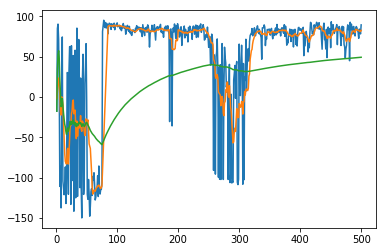

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the rewards
plt.plot(rewards_data['episode'], rewards_data['total_reward'])
plt.plot(rewards_data['episode'], rewards_data['running_average'])
plt.plot(rewards_data['episode'], rewards_data['average_reward'])
plt.show()
#_ = plt.ylim()

After much testing and modifying agent architecture and hyperparameters, my agent has achieved some reasonable level of performance that demonstrates it is being able to learn this task. The agent should be ready to tackle the quadcopter.

To simplify the quadcopter task below, I have set all rotors to the same value, so that the quadcopter can only move in the vertical direction. To visualise the quadcopter, I have adapted the render() function from OpenAI's CartPole environment.
![](quadcopter_screen.png "Quadcopter visualisation")

In [3]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import math
from agents.agent import DDPG
from task import TakeOffTask
import csv

num_episodes = 200

task = TakeOffTask()
agent = DDPG(task, gamma=0.99, theta=0.15, sigma=0.2)

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1']#, 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
rewards_data = {x : [] for x in ['episode', 'total_reward', 'running_average', 'average_reward']}

best_total_reward = -math.inf
average_reward = 0
average_10 = 0

rotor_low = task.rotor_low
rotor_range = task.rotor_range

for i_episode in range(1, num_episodes+1):
    
    state = agent.reset_episode() # start a new episode
    total_reward = 0
    episode_steps = 0
    results = {x : [] for x in labels}
    task.render()
    
    while True:
        action = agent.act(state)
        action_level = (action[0] - task.action_low)/task.action_range
        rotor_speed = rotor_low + action_level * rotor_range
        next_state, reward, done = task.step(rotor_speed)
        task.render()
        episode_steps += 1  
        total_reward += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        
        
        to_save = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + [rotor_speed] #+ list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_save[ii])
            
        if done:

            if total_reward > best_total_reward:
                best_total_reward = total_reward
            average_reward = (average_reward*(i_episode - 1) + total_reward)/i_episode        
            rewards_data['episode'].append(i_episode)
            rewards_data['total_reward'].append(total_reward)
            average_10 = sum(rewards_data['total_reward'][i_episode-10:i_episode])/10
            rewards_data['running_average'].append(average_10)
            rewards_data['average_reward'].append(average_reward)
            print("\rEpisode = {:4d}, total_reward = {:5.1f} (best = {:5.1f}), average_10 = {:5.1f}, average_reward = {:5.1f}, episode_steps = {:2d}".format(i_episode, total_reward, best_total_reward, average_10, average_reward, episode_steps))
            #print("\rEpisode = {:4d}, total_reward = {:7.3f} (best = {:7.3f}), episode_steps = {:4d}".format(i_episode, total_reward, best_total_reward, episode_steps))
            all_results.append(results)
            break
    sys.stdout.flush()
task.close()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =    1, total_reward = -100.0 (best = -100.0), average_10 = -10.0, average_reward = -100.0, episode_steps =  1
Episode =    2, total_reward = -100.0 (best = -100.0), average_10 = -20.0, average_reward = -100.0, episode_steps =  1
Episode =    3, total_reward = -100.0 (best = -100.0), average_10 = -30.0, average_reward = -100.0, episode_steps =  1
Episode =    4, total_reward = -100.0 (best = -100.0), average_10 = -40.0, average_reward = -100.0, episode_steps =  1
Episode =    5, total_reward = -100.0 (best = -100.0), average_10 = -50.0, average_reward = -100.0, episode_steps =  1
Episode =    6, total_reward = -100.0 (best = -100.0), average_10 = -40.0, average_reward = -100.0, episode_steps =  1
Episode =    7, total_reward =  35.5 (best =  35.5), average_10 = -16.4, average_reward = -80.6, episode_steps = 84
Episode =    8, total_reward = -100.0 (best =  35.5), average_10 =  -6.4, average_

Episode =   71, total_reward =  91.4 (best =  99.3), average_10 =  87.5, average_reward =  58.5, episode_steps = 84
Episode =   72, total_reward =  95.4 (best =  99.3), average_10 =  88.1, average_reward =  59.1, episode_steps = 84
Episode =   73, total_reward =  83.1 (best =  99.3), average_10 =  87.0, average_reward =  59.4, episode_steps = 84
Episode =   74, total_reward =  87.6 (best =  99.3), average_10 =  86.2, average_reward =  59.8, episode_steps = 84
Episode =   75, total_reward =  98.2 (best =  99.3), average_10 =  89.2, average_reward =  60.3, episode_steps = 84
Episode =   76, total_reward =  72.0 (best =  99.3), average_10 =  87.7, average_reward =  60.4, episode_steps = 84
Episode =   77, total_reward =  75.1 (best =  99.3), average_10 =  87.4, average_reward =  60.6, episode_steps = 84
Episode =   78, total_reward =  93.9 (best =  99.3), average_10 =  88.4, average_reward =  61.1, episode_steps = 84
Episode =   79, total_reward =  81.1 (best =  99.3), average_10 =  87.6,

Episode =  142, total_reward =  67.5 (best =  99.3), average_10 =  88.0, average_reward =  72.5, episode_steps = 84
Episode =  143, total_reward =  91.7 (best =  99.3), average_10 =  87.4, average_reward =  72.7, episode_steps = 84
Episode =  144, total_reward =  83.9 (best =  99.3), average_10 =  86.3, average_reward =  72.7, episode_steps = 84
Episode =  145, total_reward =  76.9 (best =  99.3), average_10 =  84.4, average_reward =  72.8, episode_steps = 84
Episode =  146, total_reward =  89.7 (best =  99.3), average_10 =  85.0, average_reward =  72.9, episode_steps = 84
Episode =  147, total_reward =  91.0 (best =  99.3), average_10 =  84.2, average_reward =  73.0, episode_steps = 84
Episode =  148, total_reward =  92.7 (best =  99.3), average_10 =  85.8, average_reward =  73.1, episode_steps = 84
Episode =  149, total_reward =  87.4 (best =  99.3), average_10 =  85.2, average_reward =  73.2, episode_steps = 84
Episode =  150, total_reward =  86.9 (best =  99.3), average_10 =  84.3,

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs.

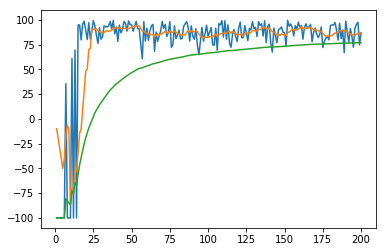

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the rewards
plt.plot(rewards_data['episode'], rewards_data['total_reward'])
plt.plot(rewards_data['episode'], rewards_data['running_average'])
plt.plot(rewards_data['episode'], rewards_data['average_reward'])
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I have designed the task for the quadcopter to take off and finish the episode at a height as close to 100m as possible. The reward function attributed rewards only at the end of the episode, as follows: -100 if the episode ends before the specified runtime (i.e. if the quadcopter crashes), and 100 minus the distance between the quadcopter otherwise. This seems to have worked reasonably to the desired end, as we can verify with the visualisations.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I have used the DDPG learning algorithm, following the sample code provided on the course website. I have played around with several different types of architectures. I have found that the architecture that worked best for me had:
- For the actor model: three dense layers with 100, 200, 100 units, each one followed by relu activation layers.
- For the critic model: 1 dense layer with 100 units for the states and actions pathways, followed by relu activation, then another two dense layers with 200 and 100 units after adding the two pathways.
I have tried to use dropout, batch normalisation, and different kinds of regularizers, but perhaps surprisingly none of those seemed to have any appreciable effect on the results or even the training speed.

I followed Lilicrap et al (2016) for the learning rates of 0.0001 and 0.001 for the actor and critic models, respectively, and soft update parameter $\tau = 0.001$. I've found best results with the buffer size of 100000 and batch size of 256. I've tried changing the values for the discount factor $\gamma$ but 0.99 seemed to give the best results. The noise parameters were best at $\theta=0.15$ and $\sigma=0.2$ as in the original code. I have also tried to modify the noise function to add an envelope for an exponential decay in the noise amplitude, but that didn't seem to help either. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It was quite hard to find a reward function that worked well. For the reward function I've settled with, the learning curve oscillates for a while at low values as the quadcopter keeps crashing or reaching low heights, and then settles at a peak value close 85 (out of a maximum value of 100), with small oscillations. That's quite a reasonable performance.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: Getting started was quite hard, but after I had written the basic code, it turned out to be very hard to find a reasonable reward function that worked, even after simplifying the problem by setting all rotors to the same value. This led me to test my agent with the ContinuousMountainCar environment, which showed that the agent was learning reasonably well, and thus that the problem was more about designing good reward functions for the task at hand.

I have found an error in the PhysicsSim code: the air resistance force was set up to always be negative (i.e. pointing down in the z axis), even when the quadcopter has a velocity in the -z direction (in which case the air resistance should point in the +z direction). This was causing a runaway behaviour if the quadcopter started moving downwards with any appreciable velocity. I have modified the physics_sym.py to fix this.